In [1]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer

In [3]:
df_test = pandas.read_csv("test.csv")
df_train = pandas.read_csv("train.csv")

In [4]:
print("Aperçu du jeu de données d'entraînement :")
print(df_train.head())

print("\n Informations sur les types de données et les valeurs manquantes :")
print(df_train.info())

print("\n Statistiques descriptives :")
print(df_train.describe())

print("\n Colonnes")
print("Noms des colonnes :", df_train.columns)

Aperçu du jeu de données d'entraînement :
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCo

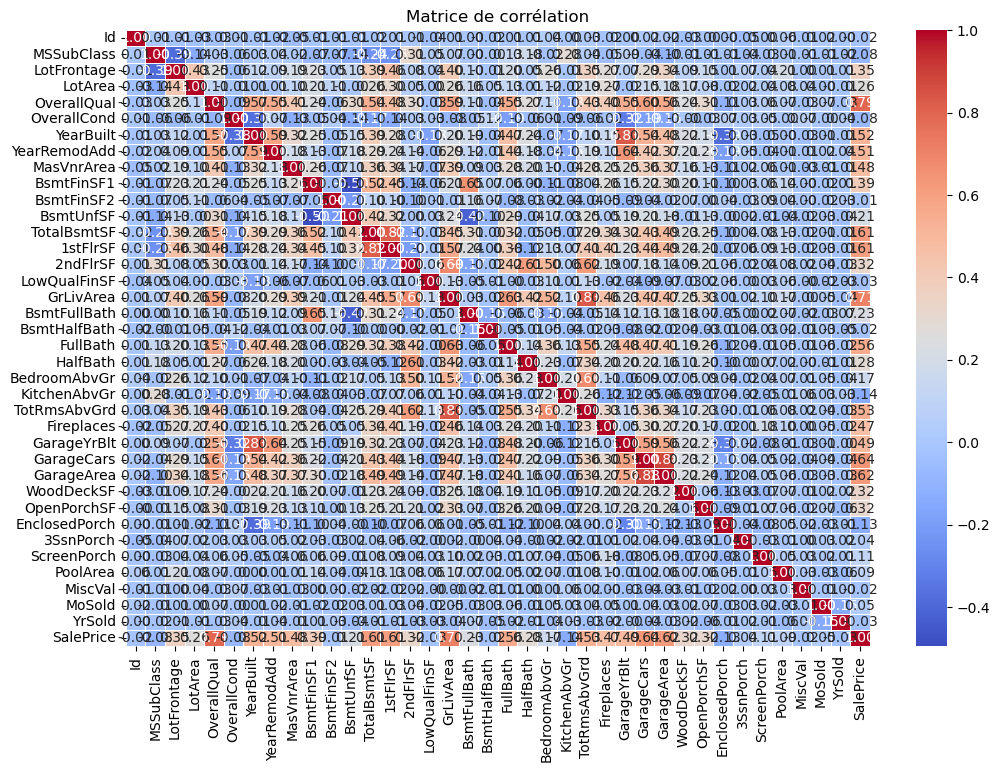

In [5]:

string_columns = df_train.select_dtypes(include=['object']).columns

numeric_columns = df_train.select_dtypes(exclude=['object'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

In [6]:
print("Aperçu du jeu de données d'entraînement :")
print(df_train.head())

print("\nInformations sur les types de données et les valeurs manquantes :")
print(df_train.info())

print("\nStatistiques descriptives :")
print(df_train.describe())

Aperçu du jeu de données d'entraînement :
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCo

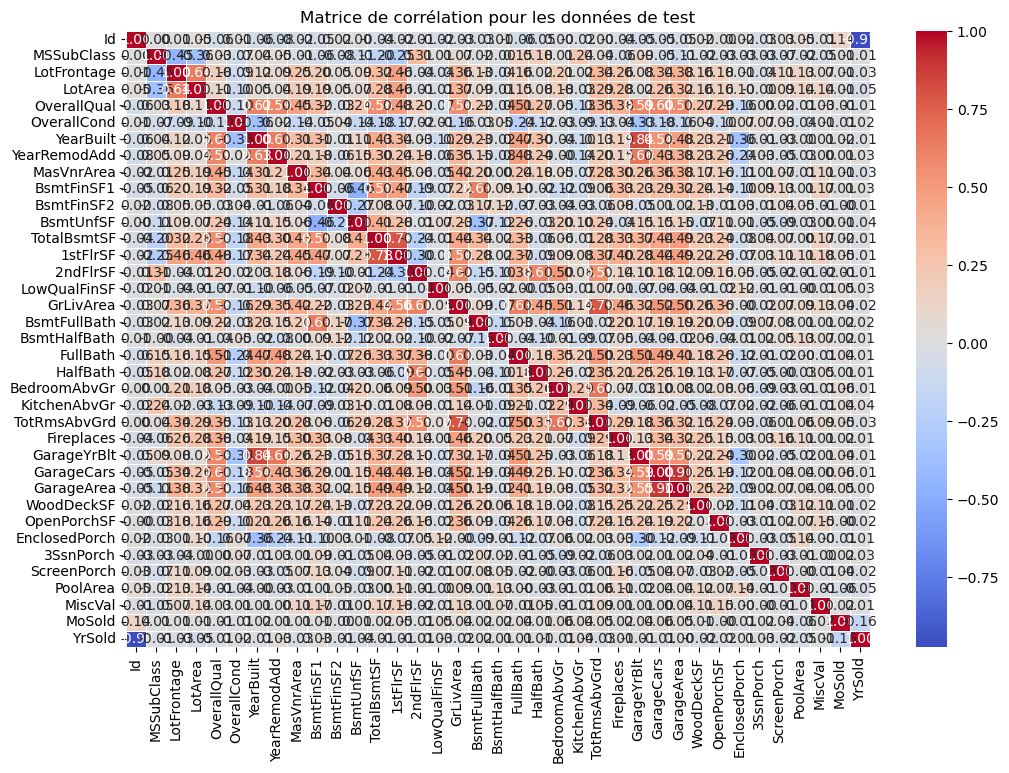

In [7]:
string_columns_test = df_test.select_dtypes(include=['object']).columns

numeric_columns_test = df_test.select_dtypes(exclude=['object'])
correlation_matrix_test = numeric_columns_test.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_test, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation pour les données de test")
plt.show()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


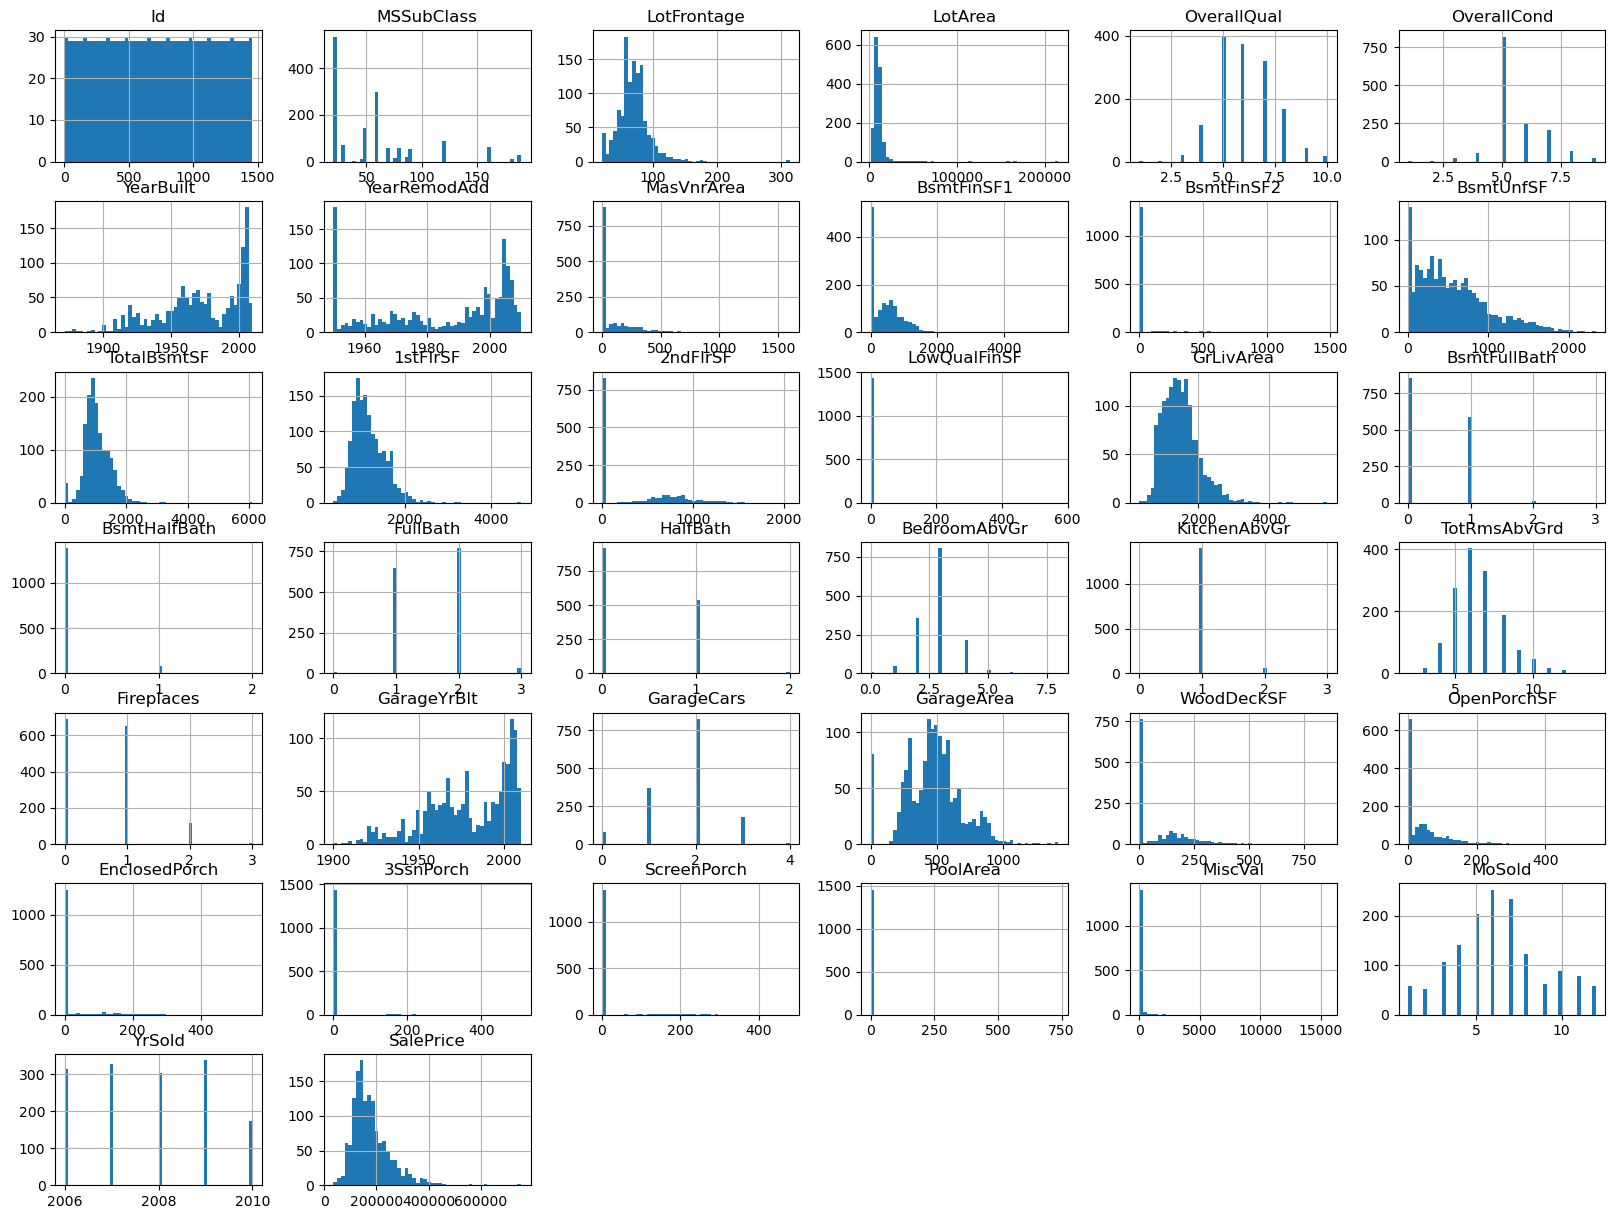

In [8]:
# - Données manquantes
print(df_train.isnull().sum())
# - Plot
df_train.hist(bins=50, figsize=(20,15))
plt.show()


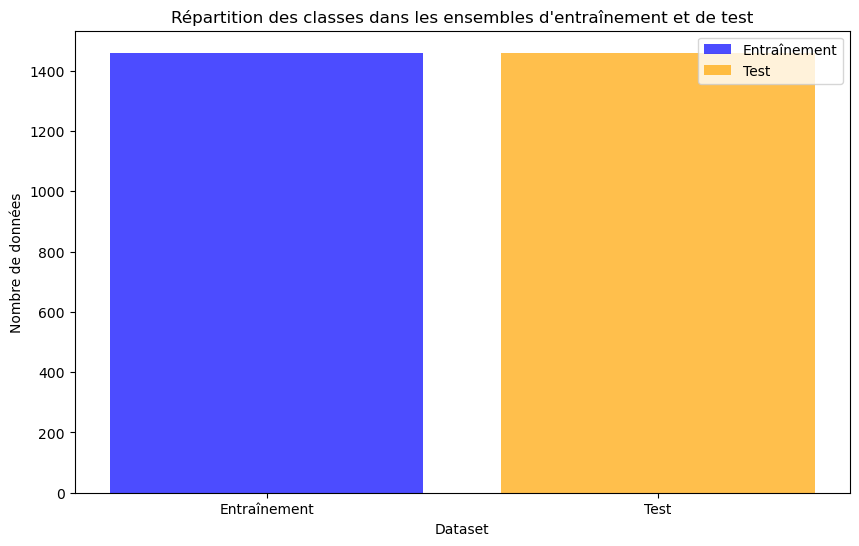

In [9]:
def graph_repartition_test_entrainement(df_train, df_test) :
    plt.figure(figsize=(10, 6))
    
    plt.bar('Entraînement', df_train.shape[0], color='blue', alpha=0.7, label='Entraînement')
    
    plt.bar('Test', df_test.shape[0], color='orange', alpha=0.7, label='Test')
    
    plt.title('Répartition des classes dans les ensembles d\'entraînement et de test')
    plt.xlabel('Dataset')
    plt.ylabel('Nombre de données')
    plt.legend()
    plt.show()

graph_repartition_test_entrainement(df_train, df_test)

In [10]:
df_train = df_train.dropna()
df_test = df_test.dropna()

In [11]:
# Apply label encoding
le = LabelEncoder()
for col in df_train.select_dtypes(include=['object']).columns:
    df_train[col] = le.fit_transform(df_train[col])

# Separate the data into explanatory variables (X) and target variable (y)
X_train = df_train.drop('GarageYrBlt', axis=1)  # Replace 'GarageYrBlt' with your actual target variable name
y_train = df_train['YearBuilt']

# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Impute missing values with a strategy (e.g., mean, median, constant)
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
X_train_split_imputed = imputer.fit_transform(X_train_split)
X_val_split_imputed = imputer.transform(X_val_split)
 
# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_split_imputed, y_train_split)

linear_model.predict([[X_val_split_imputed]])

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.